# Covid19 Evolution Model - Regional Analysis

In [ ]:
import sys
import pickle
import pandas as pd
import numpy as np
import math
from datetime import datetime
import dateutil
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
import sys
sys.path.insert(1, '../python/')
from epidemic_model import *
import init_model
import data_mgmt

In [ ]:
sns.set(style="ticks")

In [ ]:
__MOD_NAME = "Model-v5_err1abs_official"
__SAVED_MOD_PATH = "saved_models/"
__PRED_DAYS = 60
__MACRO_GEO = 'ita'

np.seterr(divide='ignore', invalid='ignore')

In [ ]:
"""
fName = __SAVED_MOD_PATH + __MOD_NAME
with open(fName, 'rb') as f:
    try:
        opt_mod_obj = pickle.load(f)
    except:
        print("error")

import_data = data_mgmt.ImportData("covid_ita_regional.csv")
"""
import_data, opt_mod_obj = init_model.getData(
    geo = __MACRO_GEO, 
    obj_path = __SAVED_MOD_PATH, 
    mod_name = __MOD_NAME,
    rel_path="../")
uff_data = data_mgmt.ActualData(import_data.data_aggr)
__DATE_CURR = np.datetime_as_string(max(uff_data.date), unit='D')

# High-level comparison by geo

In [ ]:
mod_type = 'opt'
mod_name = 'tot'

geo_list = opt_mod_obj['model'].values()
geo_codes = opt_mod_obj['model'].keys()
data = {
    'geo_code': [x for x in geo_codes],
    'area': [x['name'][0] for x in geo_list],
    'rg': [x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra': [x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'alpha': [x[mod_type][mod_name]['mod'].params['alpha'] for x in geo_list],
    'beta': [x[mod_type][mod_name]['mod'].params['beta'] for x in geo_list],
    'beta_gcn': [x[mod_type][mod_name]['mod'].params['beta_gcn'] for x in geo_list],
    'gamma': [x[mod_type][mod_name]['mod'].params['gamma'] for x in geo_list],
    't1': [x[mod_type][mod_name]['mod'].params['t1'] for x in geo_list],
    'tgi2': [x[mod_type][mod_name]['mod'].params['tgi2'] for x in geo_list],
    'tgn2': [x[mod_type][mod_name]['mod'].params['tgn2'] for x in geo_list],
    'ta2': [x[mod_type][mod_name]['mod'].params['ta2'] for x in geo_list],
    'Igs_t': [x[mod_type][mod_name]['mod'].Igs_t[0] for x in geo_list],
    'Ias_t': [x[mod_type][mod_name]['mod'].Ias_t[0] for x in geo_list],
    'err_tot': [x[mod_type][mod_name]['err_tot'] for x in geo_list]
}

df = pd.DataFrame(data)
df.sort_values('area', inplace=True)

mod_type = 'opt_window'
geo_list = opt_mod_obj['model'].values()
data_window = {
# This needs to be fixed above
    'geo_code': [x for x in geo_codes],
    'area': [x['name'][0] for x in geo_list],
    'rg': [x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra': [x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'alpha': [x[mod_type][mod_name]['mod'].params['alpha'] for x in geo_list],
    'beta': [x[mod_type][mod_name]['mod'].params['beta'] for x in geo_list],
    'beta_gcn': [x[mod_type][mod_name]['mod'].params['beta_gcn'] for x in geo_list],
    'gamma': [x[mod_type][mod_name]['mod'].params['gamma'] for x in geo_list],
    't1': [x[mod_type][mod_name]['mod'].params['t1'] for x in geo_list],
    'tgi2': [x[mod_type][mod_name]['mod'].params['tgi2'] for x in geo_list],
    'tgn2': [x[mod_type][mod_name]['mod'].params['tgn2'] for x in geo_list],
    'ta2': [x[mod_type][mod_name]['mod'].params['ta2'] for x in geo_list],
    'Igs_t': [x[mod_type][mod_name]['mod'].Igs_t[0] for x in geo_list],
    'Ias_t': [x[mod_type][mod_name]['mod'].Ias_t[0] for x in geo_list],
    'err_tot': [x[mod_type][mod_name]['err_tot'] for x in geo_list]
}

df_window = pd.DataFrame(data_window)
df_window.sort_values('area', inplace=True)

geo_list = list(df['geo_code'])
geo_list.remove('aggr')
geo_list = ['aggr'] + geo_list

geo_name_list = list(df['area'])
geo_name_list.remove('N')
geo_name_list = ['Italia'] + geo_name_list

In [ ]:
df

In [ ]:
df_window

In [ ]:
stats_param = {
    'rg': [round(df_window['rg'].min(), 4), round(df_window['rg'].mean(), 4), round(df_window['rg'].median(), 4), round(df_window['rg'].max(), 4)],
    'ra': [round(df_window['ra'].min(), 4), round(df_window['ra'].mean(), 4), round(df_window['ra'].median(), 4), round(df_window['ra'].max(), 4)],
    'alpha': [round(df_window['alpha'].min(), 4), round(df_window['alpha'].mean(), 4), round(df_window['alpha'].median(), 4), round(df_window['alpha'].max(), 4)],
    'beta': [round(df_window['beta'].min(), 4), round(df_window['beta'].mean(), 4), round(df_window['beta'].median(), 4), round(df_window['beta'].max(), 4)],
    'beta_gcn': [round(df_window['beta_gcn'].min(), 4), round(df_window['beta_gcn'].mean(), 4), round(df_window['beta_gcn'].median(), 4), round(df_window['beta_gcn'].max(), 4)],
    'gamma': [round(df_window['gamma'].min(), 4), round(df_window['gamma'].mean(), 4), round(df_window['gamma'].median(), 4), round(df_window['gamma'].max(), 4)],
    't1': [round(df_window['t1'].min(), 4), round(df_window['t1'].mean(), 4), round(df_window['t1'].median(), 4), round(df_window['t1'].max(), 4)],
    'tgi2': [round(df_window['tgi2'].min(), 4), round(df_window['tgi2'].mean(), 4), round(df_window['tgi2'].median(), 4), round(df_window['tgi2'].max(), 4)],
    'tgn2': [round(df_window['tgn2'].min(), 4), round(df_window['tgn2'].mean(), 4), round(df_window['tgn2'].median(), 4), round(df_window['tgn2'].max(), 4)],
    'ta2': [round(df_window['ta2'].min(), 4), round(df_window['ta2'].mean(), 4), round(df_window['ta2'].median(), 4), round(df_window['ta2'].max(), 4)],
    'Igs_t': [round(df_window['Igs_t'].min(), 4), round(df_window['Igs_t'].mean(), 4), round(df_window['Igs_t'].median(), 4), round(df_window['Igs_t'].max(), 4)],
    'Ias_t': [round(df_window['Ias_t'].min(), 4), round(df_window['Ias_t'].mean(), 4), round(df_window['Ias_t'].median(), 4), round(df_window['Ias_t'].max(), 4)]
}

for param in stats_param.keys():
    print(param + ": \t" + str(stats_param[param]))

# Analysis by geo/region

Geo:  Italia
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected: 178.97K vs 193.58K (3.05K vs 4.74K), errore: -14.60K
            Currently Infected: 108.26K vs 103.49K (486.00 vs -566.61), errore: 4.77K
        Currently in Int. Care:   2.63K vs   3.88K (-98.00 vs -48.73), errore: -1.25K
                 Tot Recovered:  47.05K vs  61.85K (2.13K vs 4.19K), errore: -14.79K
                      Tot Dead:  23.66K vs  28.24K (433.00 vs 1.12K), errore: -4.58K

          % Increase, Infected:    1.73 vs    2.51 (-0.29 vs -0.11), errore: -0.78
              % Mortality Rate:    1.97 vs    4.03 (-0.08 vs -0.21), errore: -2.05
         % Known Recovery Rate:    0.40 vs    1.08 (-0.05 vs  0.00), errore: -0.67

             % Recovered / Tot:   26.29 vs   31.95 ( 0.75 vs  1.42), errore: -5.66
                  % Dead / Tot:   13.22 vs   14.59 ( 0.02 vs  0.23), errore: -1.37
              % Intensive Care:    2.43 vs    3.75 (-0.10 vs -0.03), errore: -1.32
        

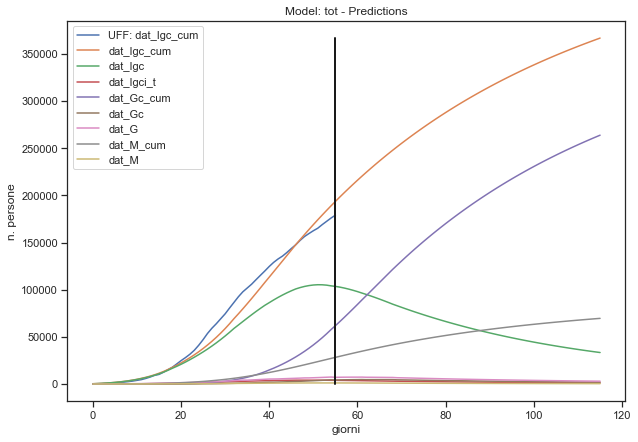

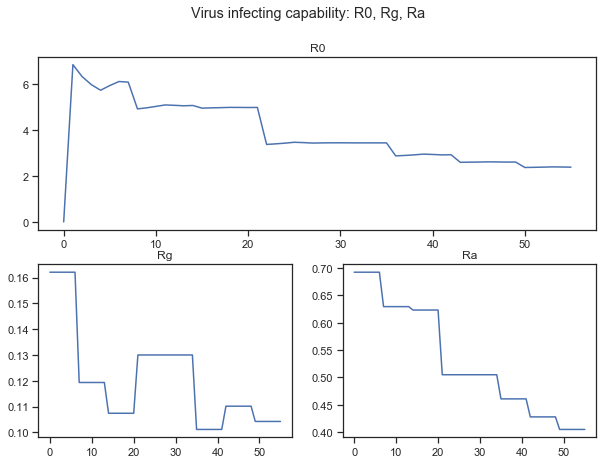

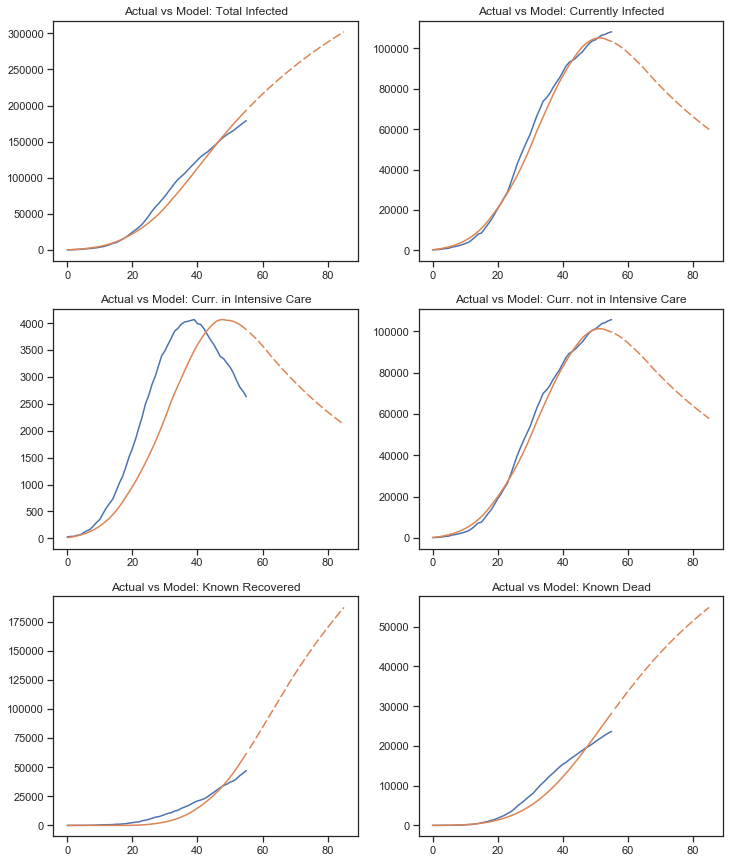



Geo:  Abruzzo
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   2.52K vs   2.72K (34.00 vs 90.60), errore: -199.53
            Currently Infected:   1.99K vs   2.05K (16.00 vs 40.30), errore: -66.82
        Currently in Int. Care:   40.00 vs   71.72 (-1.00 vs  0.98), errore: -31.72
                 Tot Recovered:  276.00 vs  371.31 (13.00 vs 37.77), errore: -95.31
                      Tot Dead:  258.00 vs  295.41 ( 5.00 vs 12.53), errore: -37.41

          % Increase, Infected:    1.37 vs    3.45 (-0.43 vs -0.08), errore: -2.08
              % Mortality Rate:    0.66 vs    1.88 ( 0.25 vs  0.05), errore: -1.22
         % Known Recovery Rate:    0.25 vs    0.62 (-0.11 vs -0.00), errore: -0.37

             % Recovered / Tot:   10.95 vs   13.65 ( 0.37 vs  0.97), errore: -2.70
                  % Dead / Tot:   10.23 vs   10.86 ( 0.06 vs  0.10), errore: -0.62
              % Intensive Care:    2.01 vs    3.49 (-0.07 vs -0.02), errore: -1.48
          %

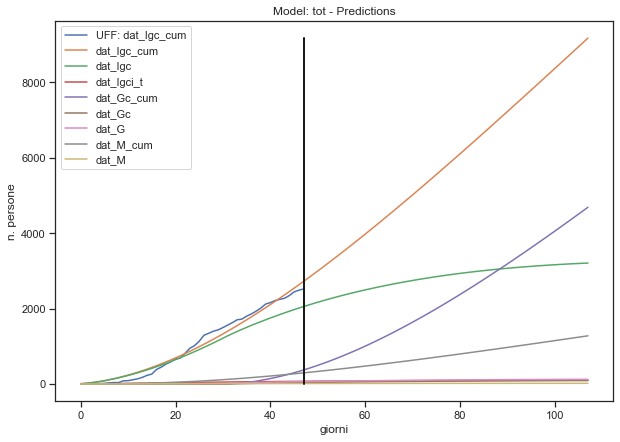

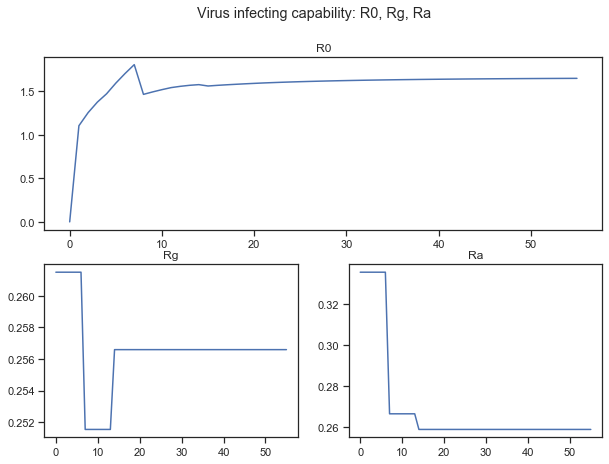

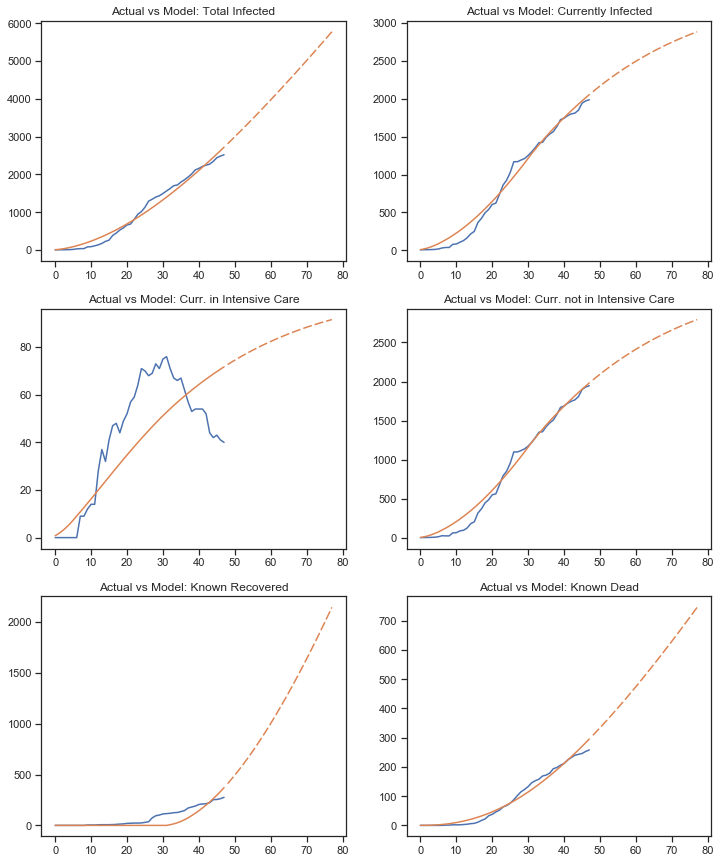



Geo:  Basilicata
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:  342.00 vs  351.50 ( 3.00 vs  5.24), errore: -9.50
            Currently Infected:  247.00 vs  259.84 (-15.00 vs -4.84), errore: -12.84
        Currently in Int. Care:    8.00 vs    9.24 ( 0.00 vs -0.48), errore: -1.24
                 Tot Recovered:   71.00 vs   66.94 (17.00 vs  9.10), errore: 4.06
                      Tot Dead:   24.00 vs   24.73 ( 1.00 vs  0.97), errore: -0.73

          % Increase, Infected:    0.88 vs    1.51 ( 0.29 vs -0.04), errore: -0.63
              % Mortality Rate:    6.49 vs    3.44 ( 4.61 vs  0.37), errore: 3.05
         % Known Recovery Rate:    0.38 vs    0.37 ( 0.01 vs -0.00), errore: 0.01

             % Recovered / Tot:   20.76 vs   19.04 ( 4.83 vs  2.34), errore: 1.72
                  % Dead / Tot:    7.02 vs    7.03 ( 0.23 vs  0.17), errore: -0.02
              % Intensive Care:    3.24 vs    3.56 ( 0.19 vs -0.12), errore: -0.32
          % Non 

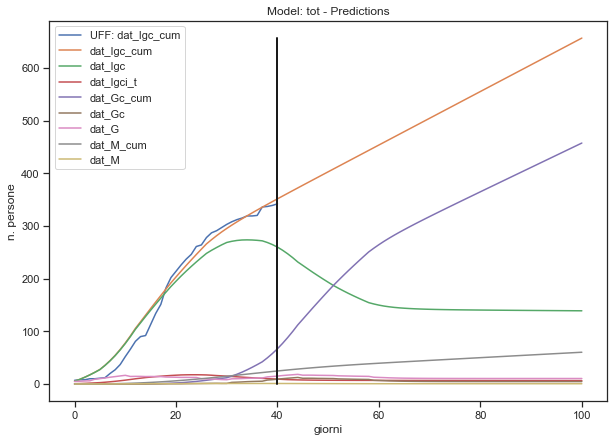

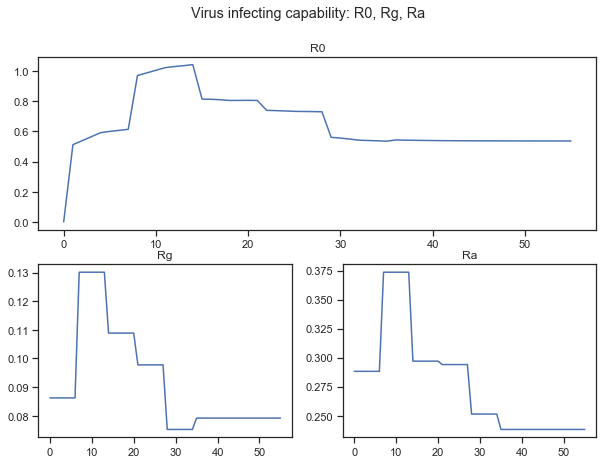

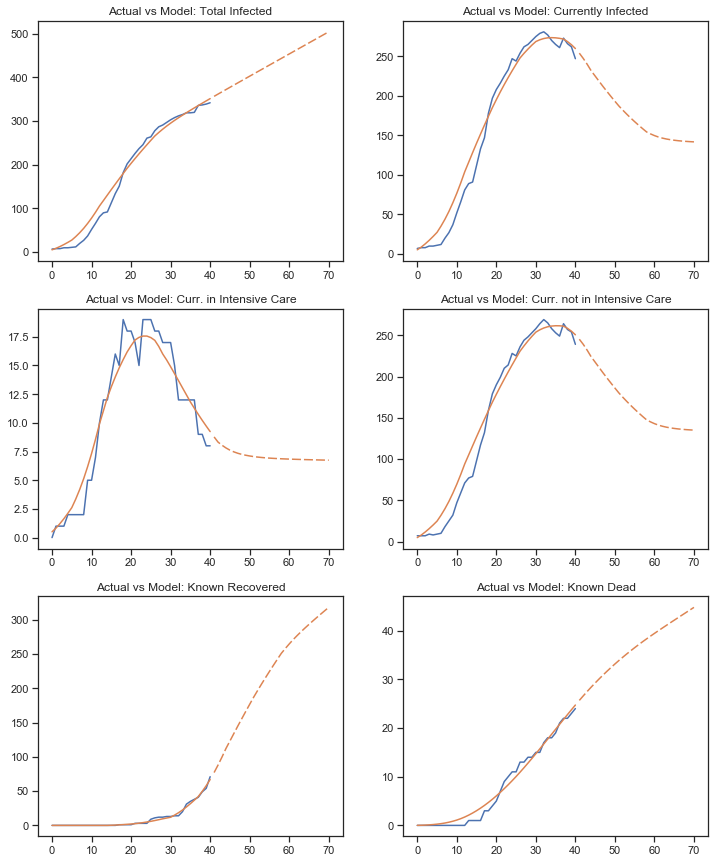



Geo:  Calabria
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   1.03K vs   1.07K (24.00 vs 23.03), errore: -32.80
            Currently Infected:  844.00 vs  844.18 (12.00 vs  1.80), errore: -0.18
        Currently in Int. Care:    6.00 vs    9.16 (-1.00 vs -0.16), errore: -3.16
                 Tot Recovered:  116.00 vs  130.88 (10.00 vs 17.28), errore: -14.88
                      Tot Dead:   75.00 vs   92.74 ( 2.00 vs  3.94), errore: -17.74

          % Increase, Infected:    2.37 vs    2.20 ( 0.36 vs  0.29), errore: 0.17
              % Mortality Rate:    1.20 vs    2.05 ( 0.35 vs  0.37), errore: -0.85
         % Known Recovery Rate:    0.24 vs    0.47 ( 0.24 vs -0.00), errore: -0.23

             % Recovered / Tot:   11.21 vs   12.26 ( 0.72 vs  1.38), errore: -1.05
                  % Dead / Tot:    7.25 vs    8.69 ( 0.03 vs  0.19), errore: -1.44
              % Intensive Care:    0.71 vs    1.08 (-0.13 vs -0.02), errore: -0.37
          % No

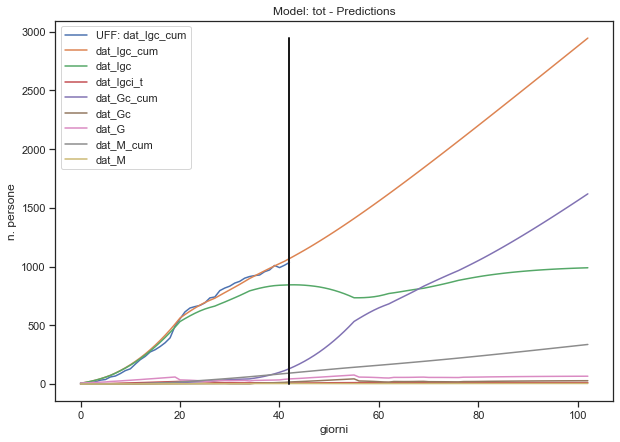

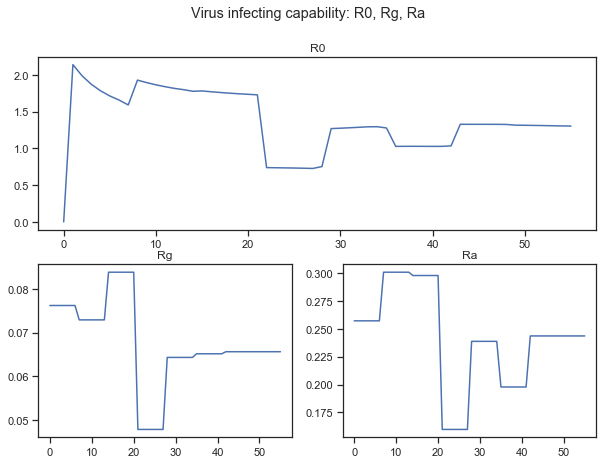

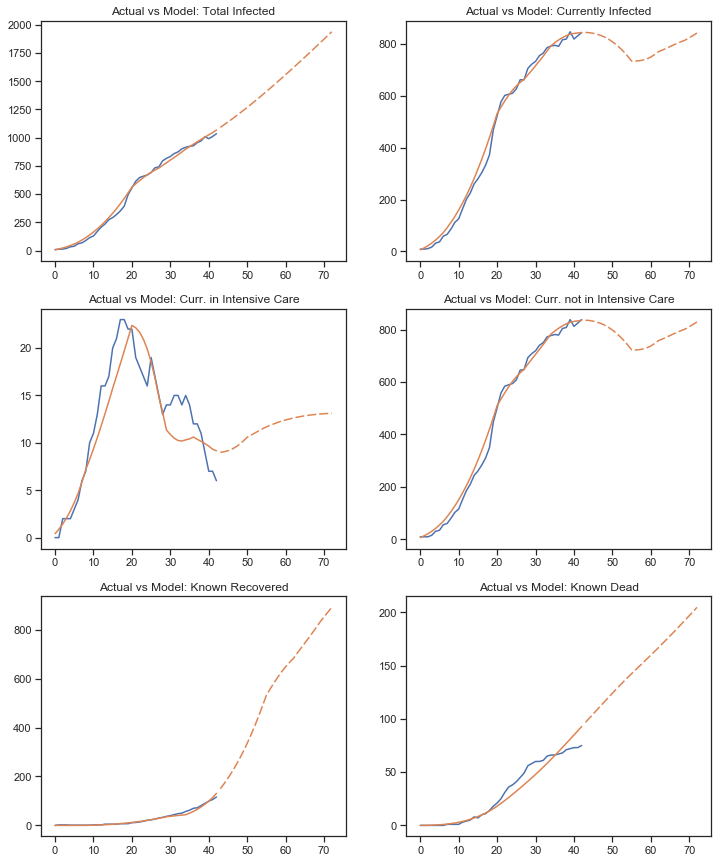



Geo:  Campania
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   4.03K vs   4.28K (41.00 vs 96.18), errore: -249.40
            Currently Infected:   3.02K vs   3.18K (-23.00 vs 14.26), errore: -161.96
        Currently in Int. Care:   61.00 vs  117.03 (-15.00 vs -0.93), errore: -56.03
                 Tot Recovered:  703.00 vs  739.98 (60.00 vs 66.69), errore: -36.98
                      Tot Dead:  304.00 vs  354.46 ( 4.00 vs 15.23), errore: -50.46

          % Increase, Infected:    1.03 vs    2.30 ( 0.09 vs -0.13), errore: -1.27
              % Mortality Rate:    1.97 vs    2.10 ( 1.57 vs  0.09), errore: -0.13
         % Known Recovery Rate:    0.13 vs    0.48 (-0.10 vs -0.00), errore: -0.35

             % Recovered / Tot:   17.45 vs   17.30 ( 1.33 vs  1.20), errore: 0.15
                  % Dead / Tot:    7.55 vs    8.28 ( 0.02 vs  0.17), errore: -0.74
              % Intensive Care:    2.02 vs    3.68 (-0.48 vs -0.05), errore: -1.66
        

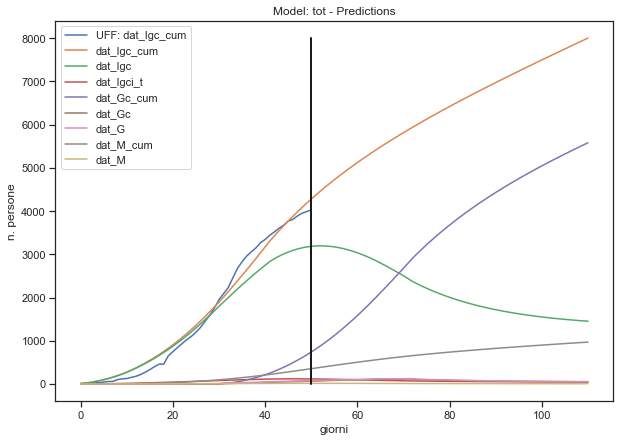

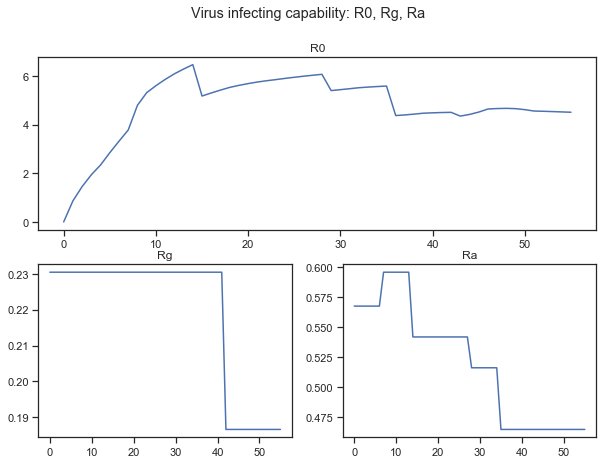

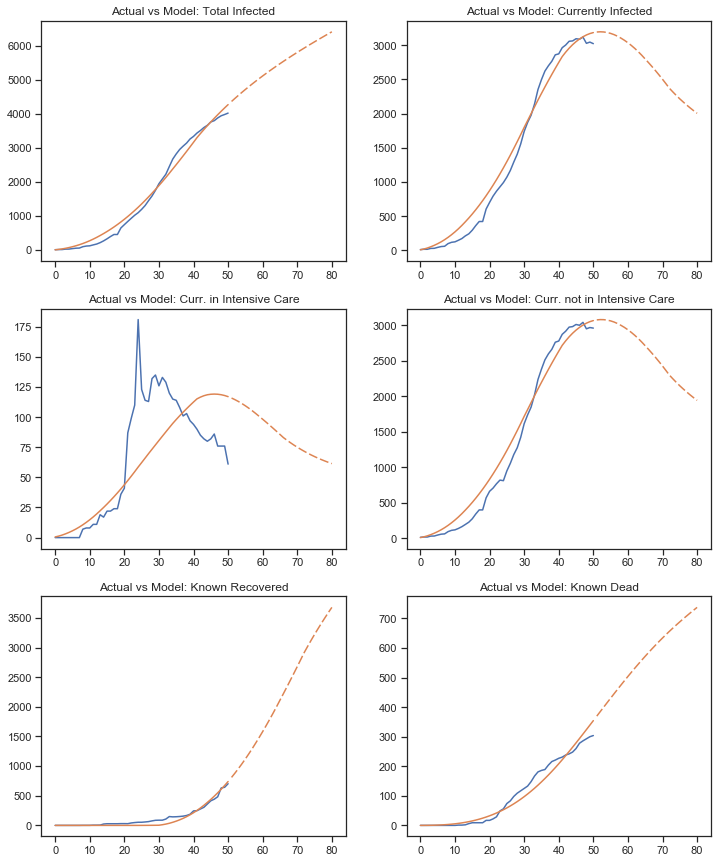



Geo:  Emilia-Romagna
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:  22.56K vs  23.33K (376.00 vs 385.24), errore: -766.68
            Currently Infected:  13.55K vs  12.89K (-32.00 vs -204.68), errore: 657.51
        Currently in Int. Care:  289.00 vs  135.01 (-7.00 vs -2.98), errore: 153.99
                 Tot Recovered:   5.99K vs   7.26K (350.00 vs 518.58), errore: -1.28K
                      Tot Dead:   3.02K vs   3.17K (58.00 vs 71.35), errore: -144.64

          % Increase, Infected:    1.69 vs    1.68 ( 0.09 vs -0.08), errore: 0.02
              % Mortality Rate:    2.58 vs    3.96 ( 0.45 vs  0.24), errore: -1.38
         % Known Recovery Rate:    0.43 vs    0.54 (-0.03 vs -0.00), errore: -0.12

             % Recovered / Tot:   26.53 vs   31.14 ( 1.13 vs  1.74), errore: -4.61
                  % Dead / Tot:   13.40 vs   13.58 ( 0.03 vs  0.08), errore: -0.18
              % Intensive Care:    2.13 vs    1.05 (-0.05 vs -0.01), errore: 1.0

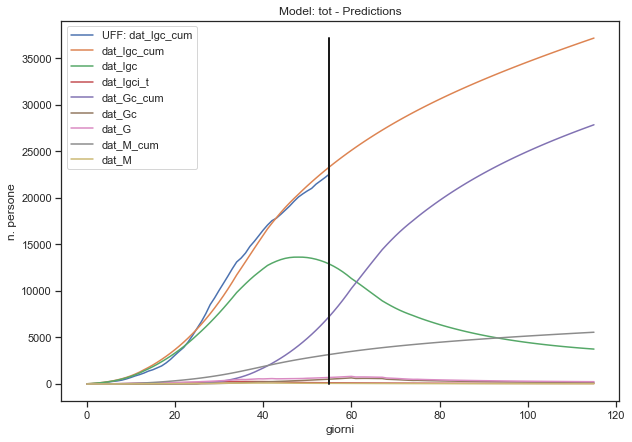

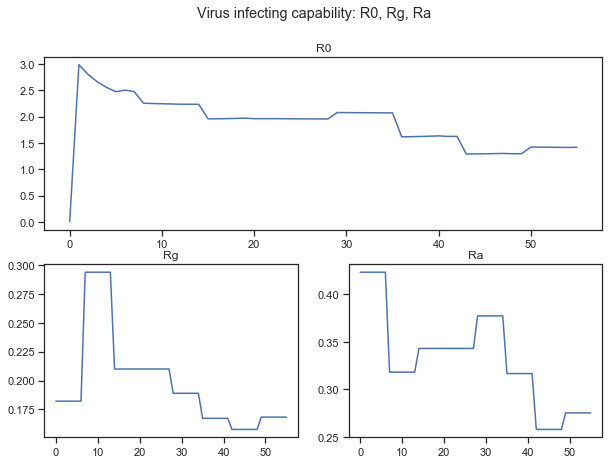

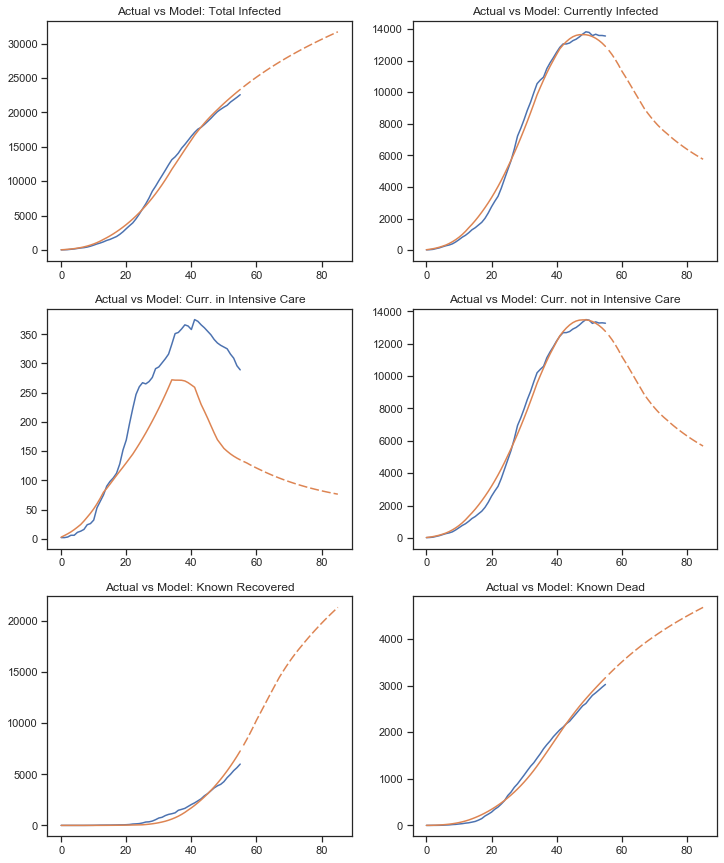



Geo:  Friuli Venezia Giulia
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   2.75K vs   2.82K (14.00 vs 50.55), errore: -70.28
            Currently Infected:   1.34K vs   1.14K (-66.00 vs -30.62), errore: 194.93
        Currently in Int. Care:   25.00 vs   33.90 (-2.00 vs -1.00), errore: -8.90
                 Tot Recovered:   1.18K vs   1.43K (77.00 vs 74.73), errore: -242.69
                      Tot Dead:  225.00 vs  247.52 ( 3.00 vs  6.43), errore: -22.52

          % Increase, Infected:    0.51 vs    1.83 (-1.58 vs -0.07), errore: -1.32
              % Mortality Rate:    5.49 vs    6.37 (-0.04 vs  0.17), errore: -0.88
         % Known Recovery Rate:    0.21 vs    0.55 ( 0.07 vs -0.00), errore: -0.33

             % Recovered / Tot:   43.10 vs   50.64 ( 2.60 vs  1.78), errore: -7.54
                  % Dead / Tot:    8.20 vs    8.79 ( 0.07 vs  0.07), errore: -0.60
              % Intensive Care:    1.87 vs    2.97 (-0.05 vs -0.01), errore: -1

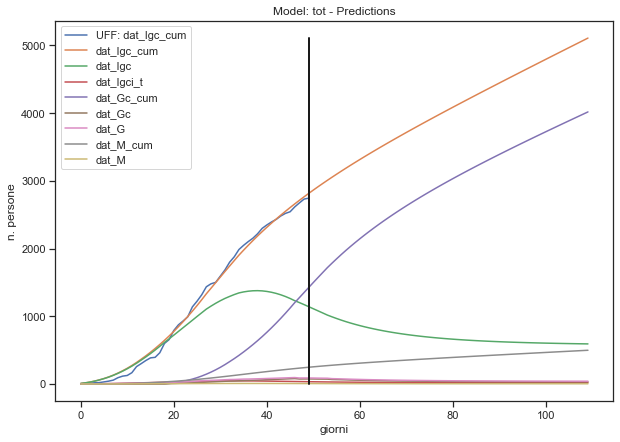

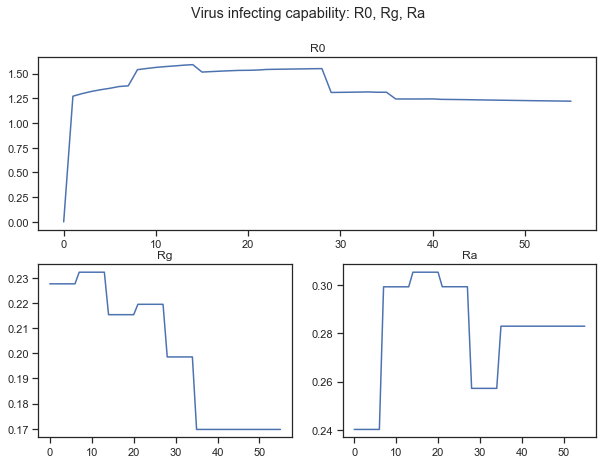

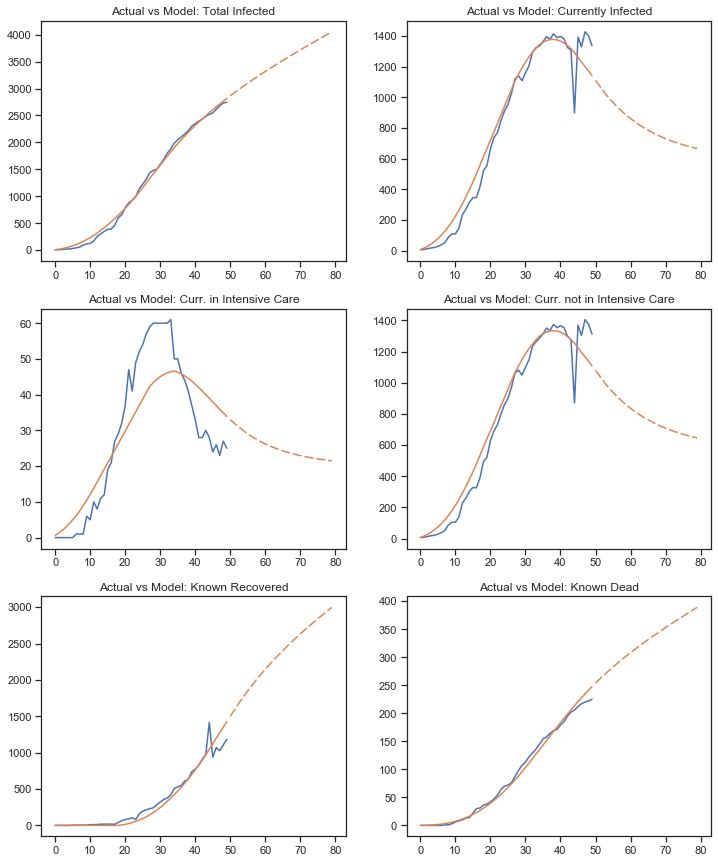



Geo:  Lazio
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   5.75K vs   5.84K (87.00 vs 110.66), errore: -81.00
            Currently Infected:   4.32K vs   4.20K (39.00 vs  9.43), errore: 122.83
        Currently in Int. Care:  185.00 vs  106.38 (-1.00 vs -7.43), errore: 78.62
                 Tot Recovered:   1.09K vs   1.23K (47.00 vs 83.99), errore: -137.47
                      Tot Dead:  341.00 vs  407.36 ( 1.00 vs 17.24), errore: -66.36

          % Increase, Infected:    1.53 vs    1.93 (-1.07 vs -0.13), errore: -0.40
              % Mortality Rate:    1.10 vs    2.01 (-0.52 vs  0.07), errore: -0.91
         % Known Recovery Rate:    0.02 vs    0.41 (-0.17 vs -0.00), errore: -0.39

             % Recovered / Tot:   18.99 vs   21.08 ( 0.54 vs  1.06), errore: -2.09
                  % Dead / Tot:    5.93 vs    6.98 (-0.07 vs  0.17), errore: -1.05
              % Intensive Care:    4.28 vs    2.53 (-0.06 vs -0.18), errore: 1.75
          % No

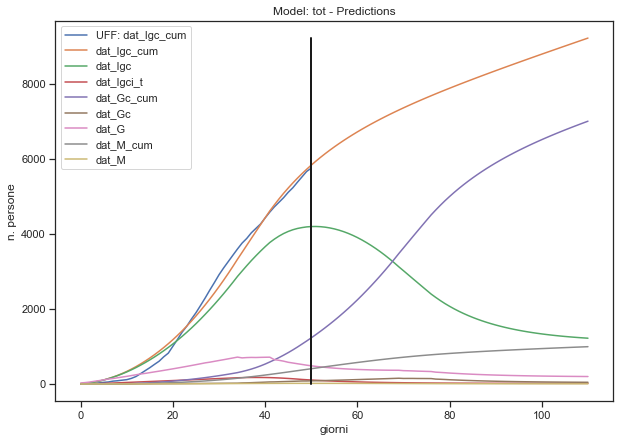

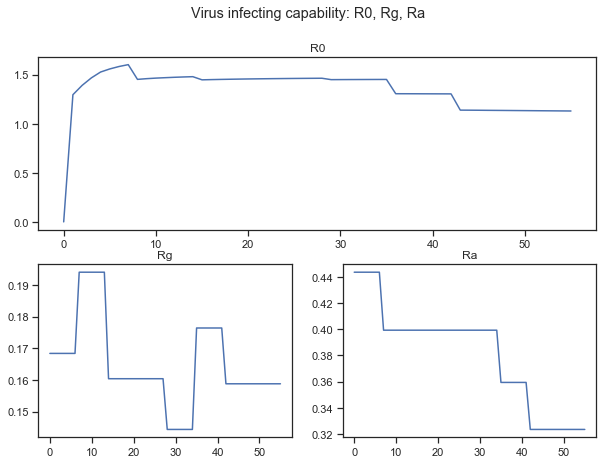

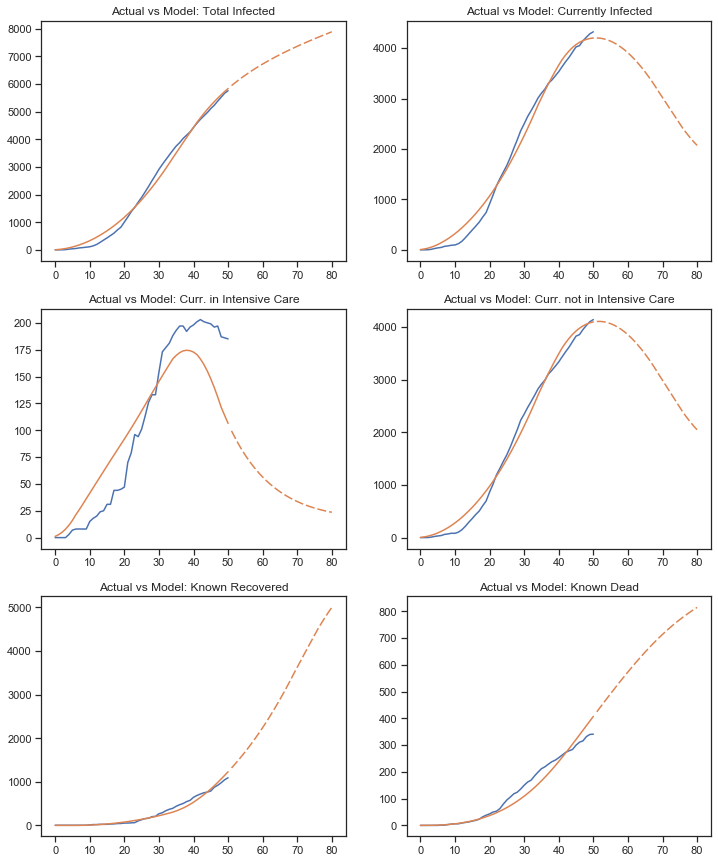



Geo:  Liguria
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   6.53K vs   6.68K (227.00 vs 157.26), errore: -155.68
            Currently Infected:   3.49K vs   3.43K (78.00 vs -12.59), errore: 62.83
        Currently in Int. Care:  101.00 vs  160.25 (-4.00 vs -3.01), errore: -59.25
                 Tot Recovered:   2.11K vs   2.22K (118.00 vs 130.25), errore: -114.43
                      Tot Dead:  928.00 vs   1.03K (31.00 vs 39.59), errore: -104.07

          % Increase, Infected:    3.60 vs    2.41 ( 1.78 vs -0.12), errore: 1.19
              % Mortality Rate:    3.46 vs    3.79 (-0.27 vs  0.09), errore: -0.33
         % Known Recovery Rate:    0.91 vs    1.15 ( 0.01 vs  0.00), errore: -0.24

             % Recovered / Tot:   32.32 vs   33.28 ( 0.71 vs  1.19), errore: -0.96
                  % Dead / Tot:   14.22 vs   15.44 (-0.02 vs  0.23), errore: -1.23
              % Intensive Care:    2.89 vs    4.68 (-0.18 vs -0.07), errore: -1.78
      

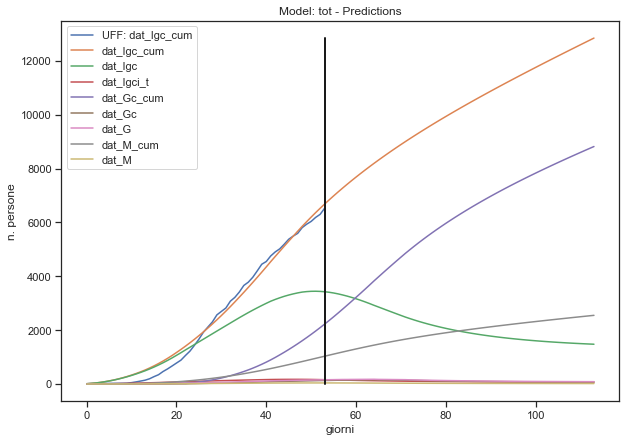

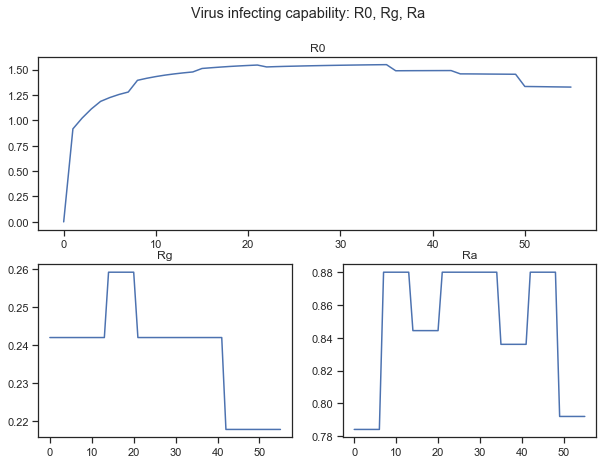

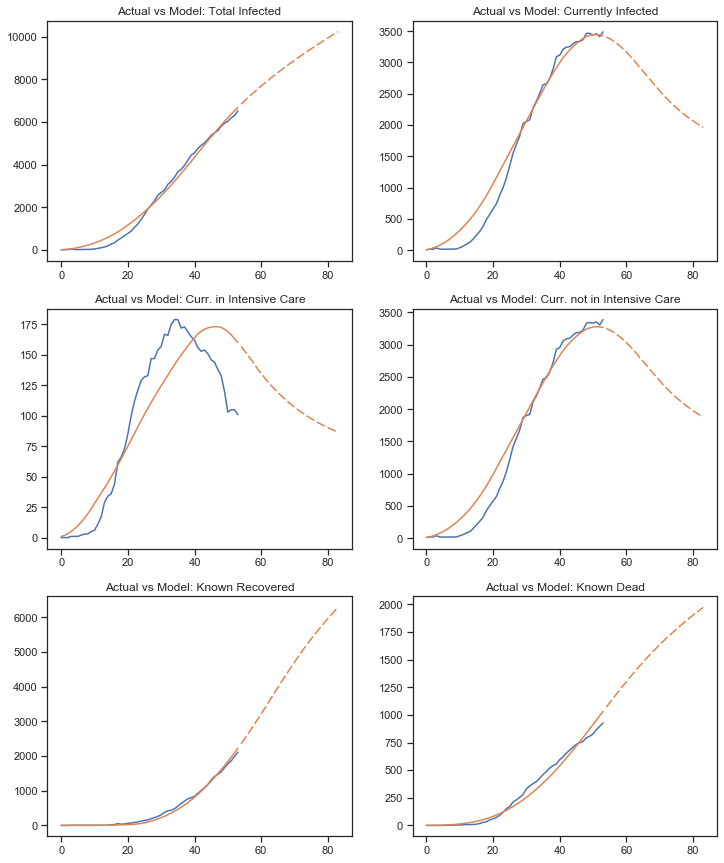



Geo:  Lombardia
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:  66.24K vs  73.05K (855.00 vs 1.87K), errore: -6.81K
            Currently Infected:  34.50K vs  32.13K (302.00 vs 85.44), errore: 2.37K
        Currently in Int. Care:  922.00 vs   1.38K (-25.00 vs -3.44), errore: -462.02
                 Tot Recovered:  19.53K vs  26.46K (390.00 vs 1.29K), errore: -6.93K
                      Tot Dead:  12.21K vs  14.46K (163.00 vs 491.79), errore: -2.25K

          % Increase, Infected:    1.31 vs    2.63 (-0.64 vs -0.08), errore: -1.32
              % Mortality Rate:    1.14 vs    4.04 ( 0.29 vs  0.08), errore: -2.90
         % Known Recovery Rate:    0.48 vs    1.53 (-0.12 vs  0.00), errore: -1.06

             % Recovered / Tot:   29.48 vs   36.22 ( 0.21 vs  0.87), errore: -6.74
                  % Dead / Tot:   18.44 vs   19.79 ( 0.01 vs  0.17), errore: -1.36
              % Intensive Care:    2.67 vs    4.31 (-0.10 vs -0.02), errore: -1.63
    

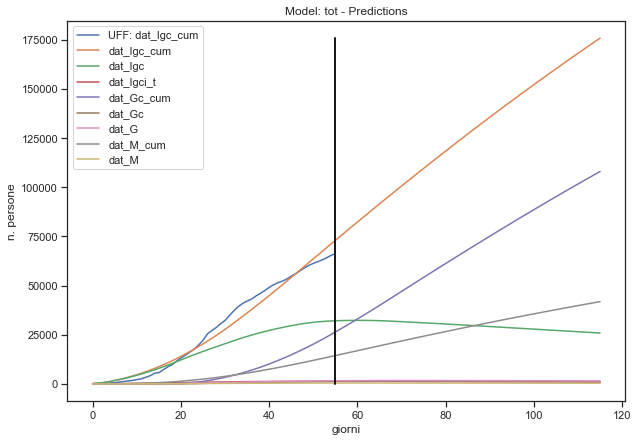

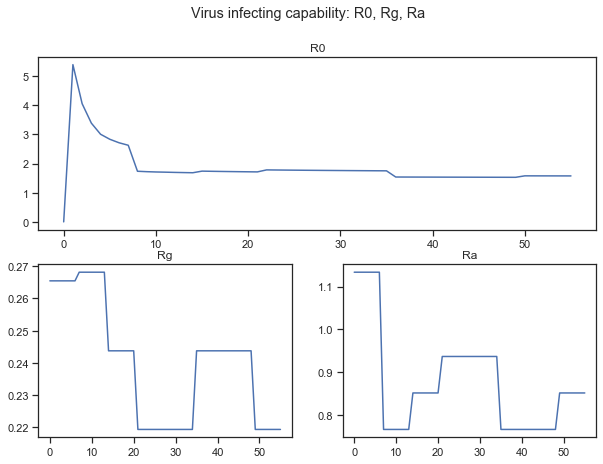

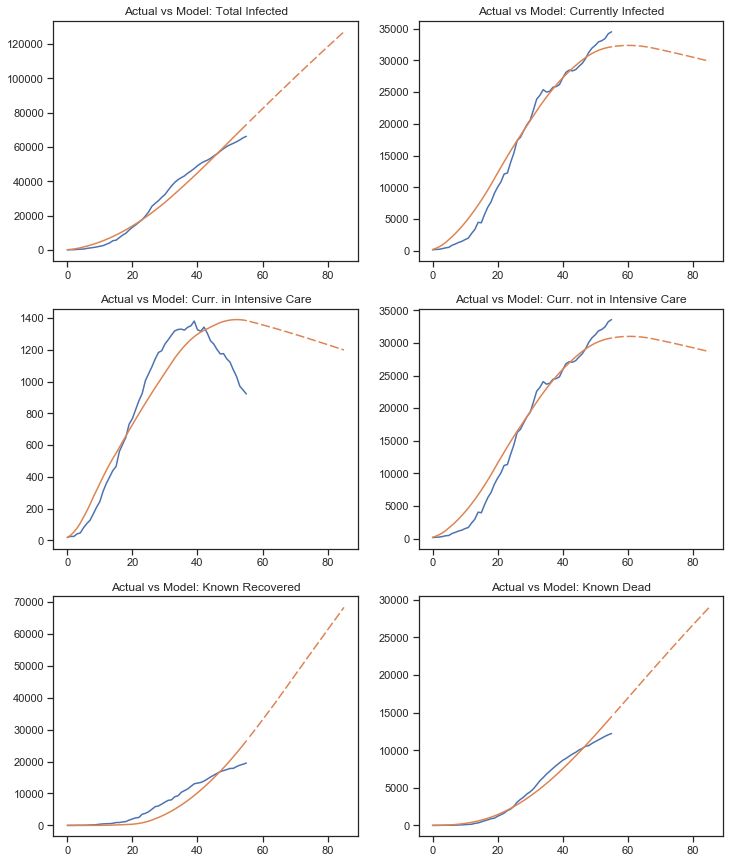



Geo:  Marche
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   5.77K vs   5.96K (48.00 vs 76.20), errore: -194.51
            Currently Infected:   3.18K vs   3.02K (10.00 vs -82.95), errore: 162.95
        Currently in Int. Care:   86.00 vs  107.16 (-2.00 vs -4.77), errore: -21.16
                 Tot Recovered:   1.78K vs   2.01K (26.00 vs 130.85), errore: -234.10
                      Tot Dead:  807.00 vs  930.37 (12.00 vs 28.30), errore: -123.37

          % Increase, Infected:    0.84 vs    1.29 (-0.10 vs -0.09), errore: -0.46
              % Mortality Rate:    0.82 vs    4.22 (-0.07 vs  0.18), errore: -3.40
         % Known Recovery Rate:    0.38 vs    0.91 ( 0.06 vs  0.00), errore: -0.53

             % Recovered / Tot:   30.85 vs   33.77 ( 0.20 vs  1.79), errore: -2.92
                  % Dead / Tot:   13.99 vs   15.60 ( 0.09 vs  0.28), errore: -1.61
              % Intensive Care:    2.70 vs    3.55 (-0.07 vs -0.06), errore: -0.85
        

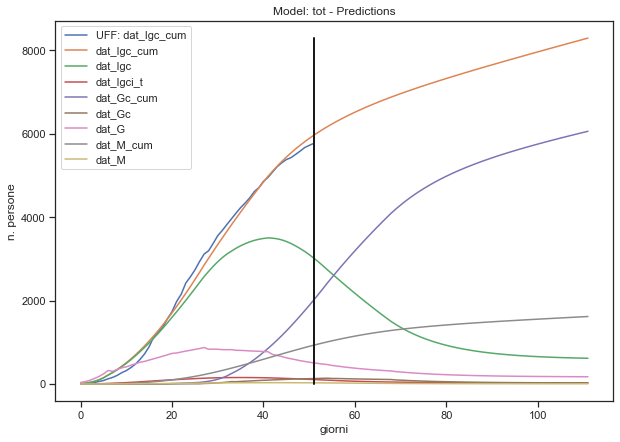

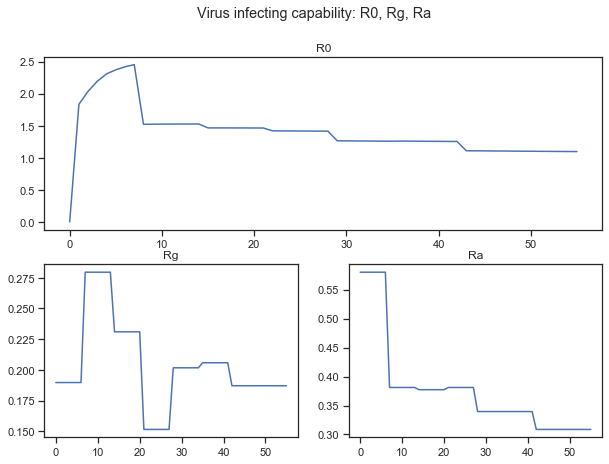

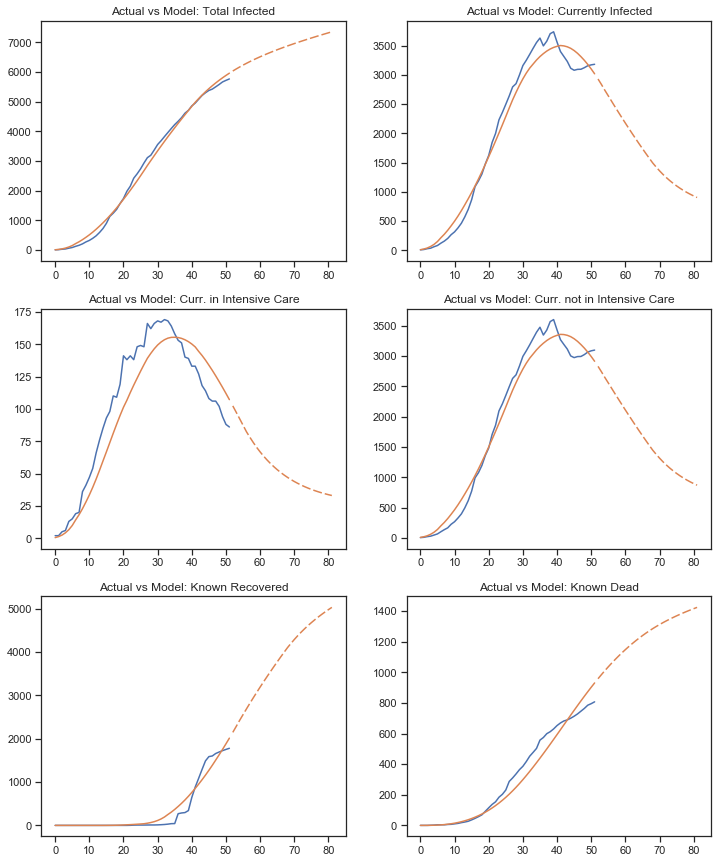



Geo:  Molise
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:  279.00 vs  297.64 (10.00 vs  6.51), errore: -18.64
            Currently Infected:  215.00 vs  209.12 ( 6.00 vs -0.51), errore: 5.88
        Currently in Int. Care:    4.00 vs    6.35 ( 0.00 vs -0.17), errore: -2.35
                 Tot Recovered:   47.00 vs   66.47 ( 3.00 vs  6.14), errore: -19.47
                      Tot Dead:   17.00 vs   22.05 ( 1.00 vs  0.88), errore: -5.05

          % Increase, Infected:    3.72 vs    2.23 ( 3.72 vs -0.10), errore: 1.48
              % Mortality Rate:    1.44 vs    2.93 ( 1.92 vs  0.25), errore: -1.49
         % Known Recovery Rate:    0.48 vs    0.42 ( 0.48 vs -0.00), errore: 0.06

             % Recovered / Tot:   16.85 vs   22.33 ( 0.49 vs  1.61), errore: -5.49
                  % Dead / Tot:    6.09 vs    7.41 ( 0.15 vs  0.14), errore: -1.32
              % Intensive Care:    1.86 vs    3.04 (-0.05 vs -0.07), errore: -1.18
          % Non Int

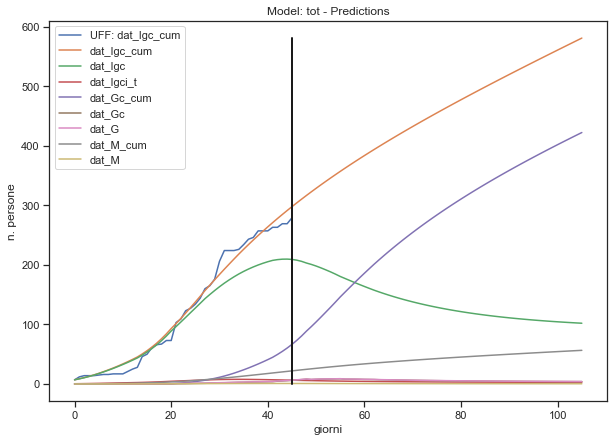

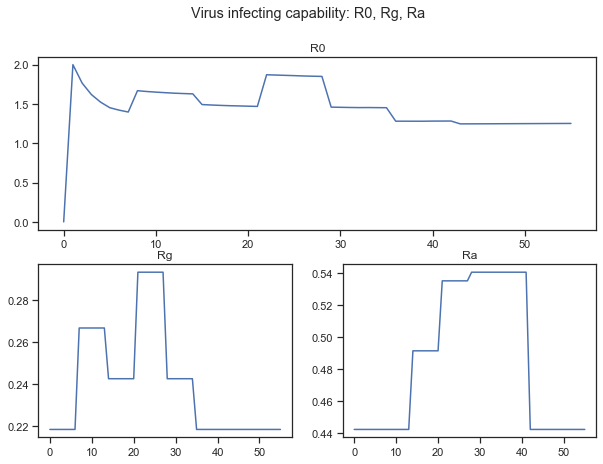

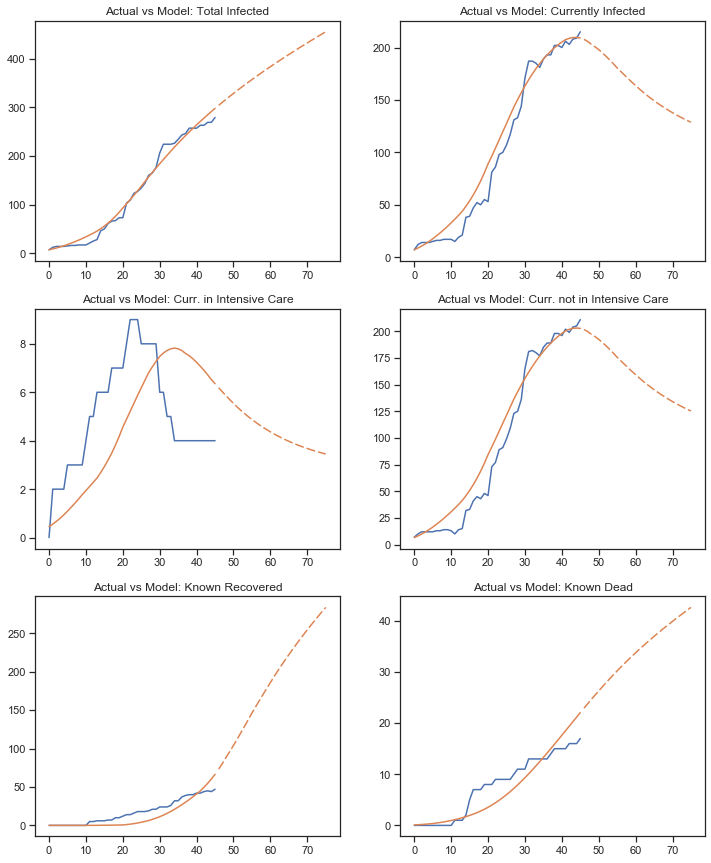



Geo:  Piemonte
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:  21.06K vs  22.31K (593.00 vs 734.76), errore: -1.26K
            Currently Infected:  14.47K vs  14.61K (247.00 vs 192.00), errore: -141.46
        Currently in Int. Care:  305.00 vs  627.79 (-18.00 vs 14.20), errore: -322.79
                 Tot Recovered:   4.26K vs   5.06K (267.00 vs 410.06), errore: -807.47
                      Tot Dead:   2.33K vs   2.64K (79.00 vs 132.70), errore: -308.27

          % Increase, Infected:    2.90 vs    3.40 (-0.44 vs -0.15), errore: -0.51
              % Mortality Rate:    1.88 vs    2.84 (-0.66 vs -0.00), errore: -0.97
         % Known Recovery Rate:    0.56 vs    0.92 (-0.02 vs -0.00), errore: -0.36

             % Recovered / Tot:   20.21 vs   22.69 ( 0.72 vs  1.13), errore: -2.48
                  % Dead / Tot:   11.07 vs   11.83 ( 0.07 vs  0.21), errore: -0.76
              % Intensive Care:    2.11 vs    4.30 (-0.16 vs  0.04), errore: -2.19

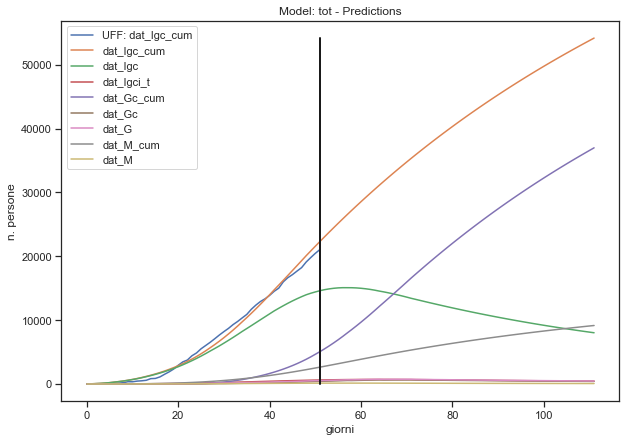

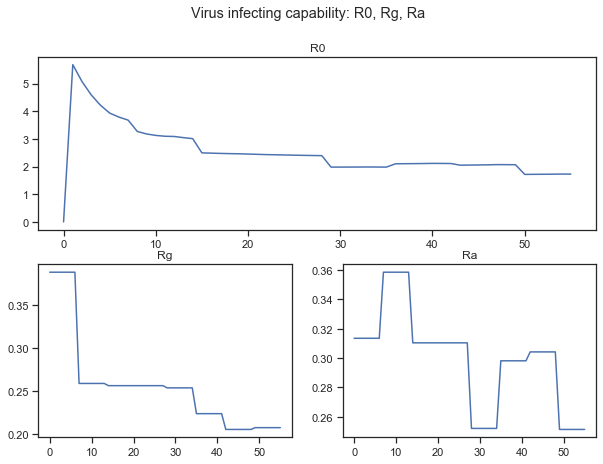

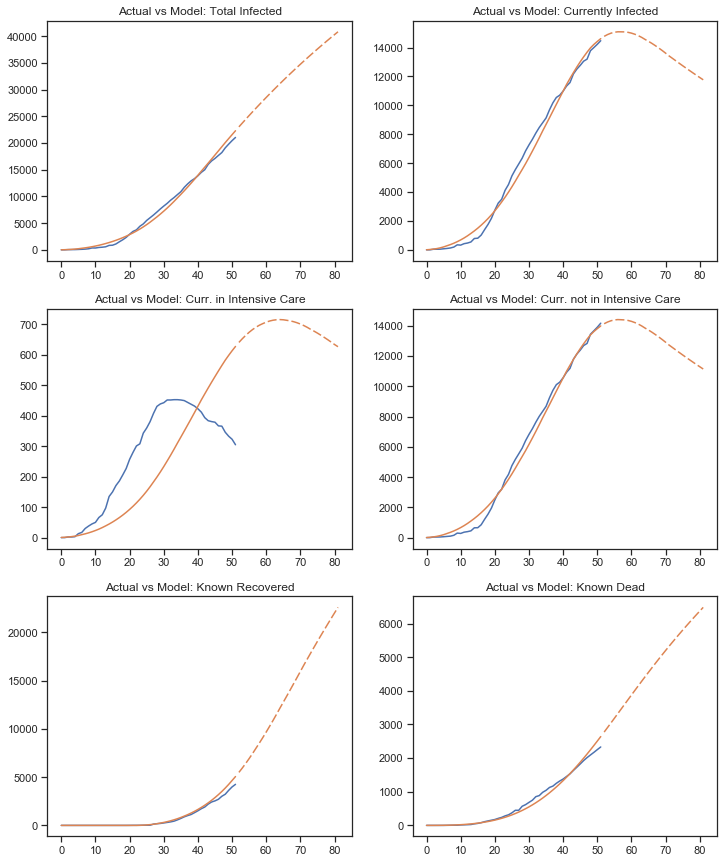



Geo:  Puglia
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   3.53K vs   3.60K (120.00 vs 90.83), errore: -73.20
            Currently Infected:   2.79K vs   2.71K (92.00 vs 20.41), errore: 75.64
        Currently in Int. Care:   60.00 vs   76.71 ( 0.00 vs -1.48), errore: -16.71
                 Tot Recovered:  427.00 vs  526.13 (26.00 vs 53.84), errore: -99.13
                      Tot Dead:  316.00 vs  365.71 ( 2.00 vs 16.57), errore: -49.71

          % Increase, Infected:    3.52 vs    2.59 ( 1.06 vs -0.09), errore: 0.93
              % Mortality Rate:    0.97 vs    2.00 (-0.43 vs  0.04), errore: -1.04
         % Known Recovery Rate:    0.07 vs    0.62 (-0.19 vs -0.00), errore: -0.54

             % Recovered / Tot:   12.10 vs   14.61 ( 0.34 vs  1.16), errore: -2.51
                  % Dead / Tot:    8.95 vs   10.15 (-0.26 vs  0.21), errore: -1.20
              % Intensive Care:    2.15 vs    2.83 (-0.07 vs -0.08), errore: -0.68
          % No

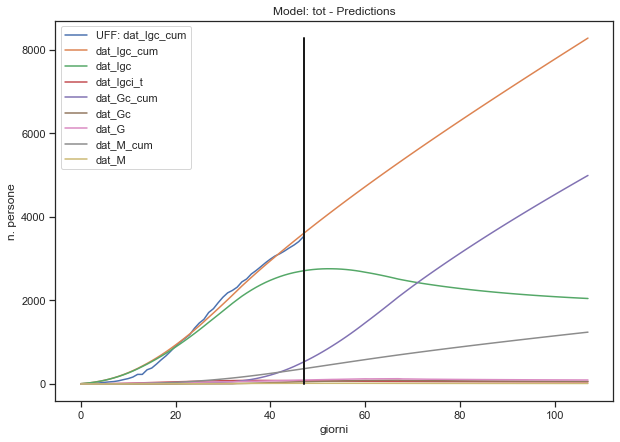

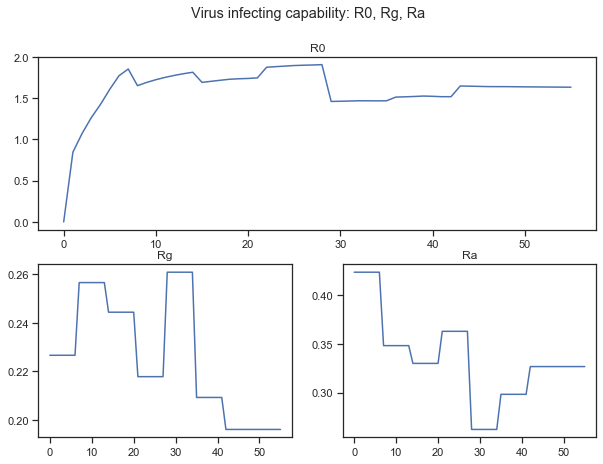

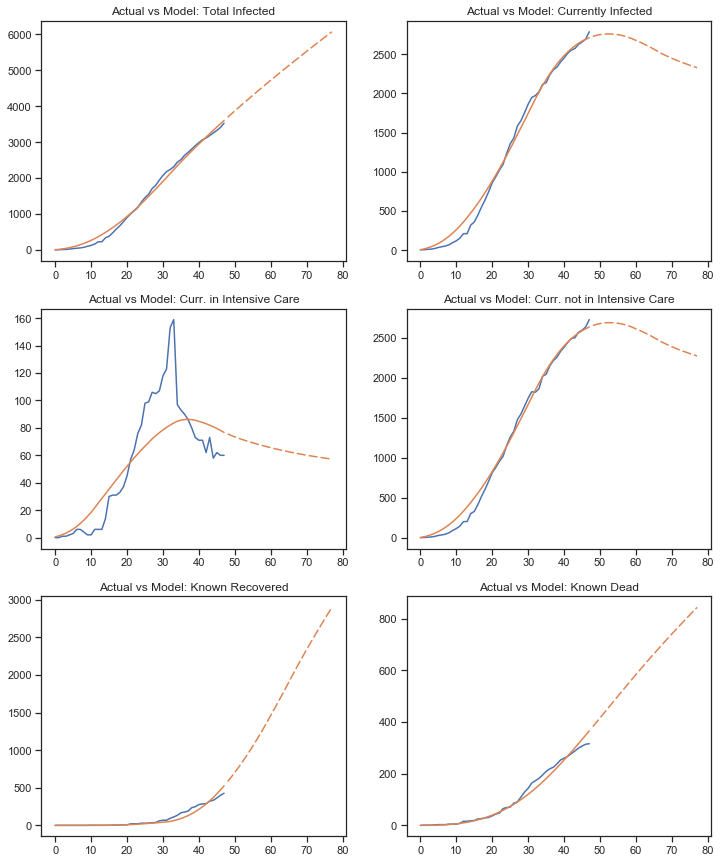



Geo:  Sardegna
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   1.22K vs   1.29K (17.00 vs 27.98), errore: -73.53
            Currently Infected:  864.00 vs  874.83 (-17.00 vs -5.84), errore: -10.83
        Currently in Int. Care:   22.00 vs   27.48 (-1.00 vs -0.20), errore: -5.48
                 Tot Recovered:  265.00 vs  314.83 (34.00 vs 29.84), errore: -49.83
                      Tot Dead:   86.00 vs   98.87 ( 0.00 vs  3.98), errore: -12.87

          % Increase, Infected:    1.42 vs    2.22 (-0.28 vs -0.07), errore: -0.80
              % Mortality Rate:    3.86 vs    3.39 ( 2.60 vs  0.07), errore: 0.47
         % Known Recovery Rate:    0.00 vs    0.45 ( 0.00 vs  0.00), errore: -0.45

             % Recovered / Tot:   21.81 vs   24.43 ( 2.53 vs  1.82), errore: -2.62
                  % Dead / Tot:    7.08 vs    7.67 (-0.10 vs  0.15), errore: -0.59
              % Intensive Care:    2.55 vs    3.14 (-0.06 vs -0.00), errore: -0.60
          % 

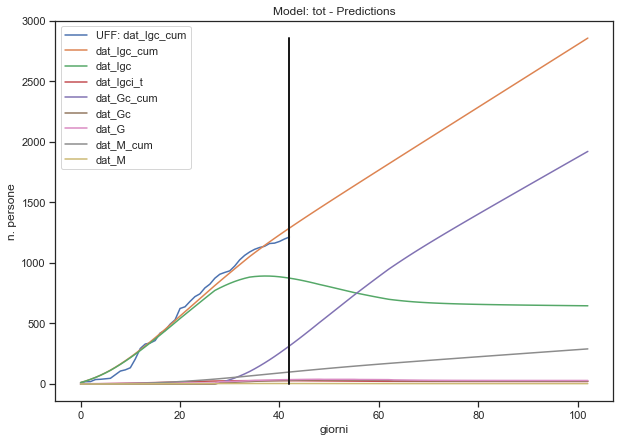

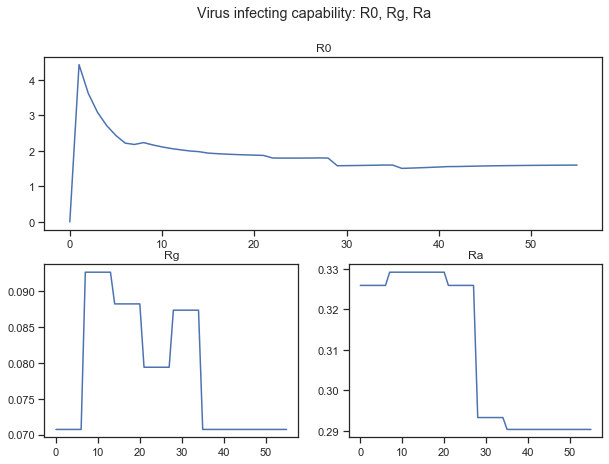

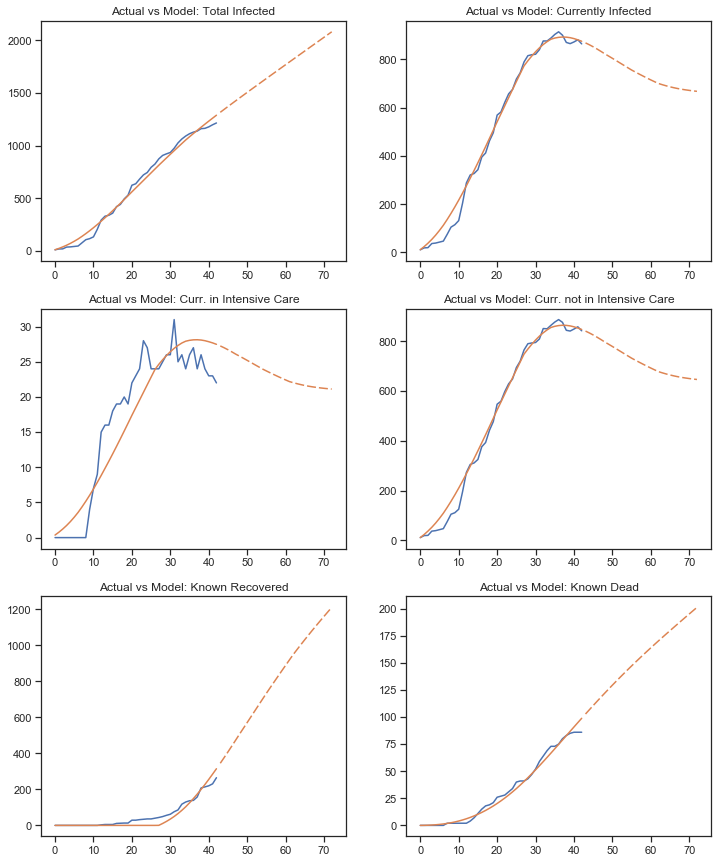



Geo:  Sicilia
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   2.72K vs   2.78K (45.00 vs 52.87), errore: -60.85
            Currently Infected:   2.20K vs   2.11K (31.00 vs -12.62), errore: 95.65
        Currently in Int. Care:   41.00 vs   59.35 (-1.00 vs -1.77), errore: -18.35
                 Tot Recovered:  315.00 vs  443.47 (10.00 vs 55.74), errore: -128.47
                      Tot Dead:  200.00 vs  228.03 ( 4.00 vs  9.76), errore: -28.03

          % Increase, Infected:    1.68 vs    1.94 (-0.11 vs -0.07), errore: -0.26
              % Mortality Rate:    0.46 vs    2.63 ( 0.04 vs  0.29), errore: -2.17
         % Known Recovery Rate:    0.18 vs    0.46 (-0.10 vs  0.00), errore: -0.28

             % Recovered / Tot:   11.59 vs   15.96 ( 0.18 vs  1.74), errore: -4.37
                  % Dead / Tot:    7.36 vs    8.21 ( 0.03 vs  0.20), errore: -0.85
              % Intensive Care:    1.86 vs    2.82 (-0.07 vs -0.07), errore: -0.96
          %

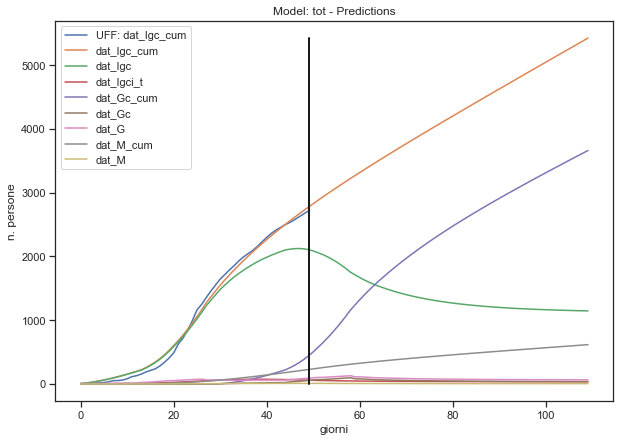

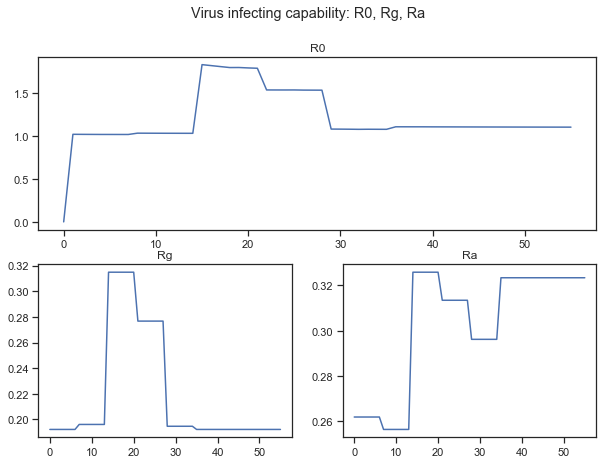

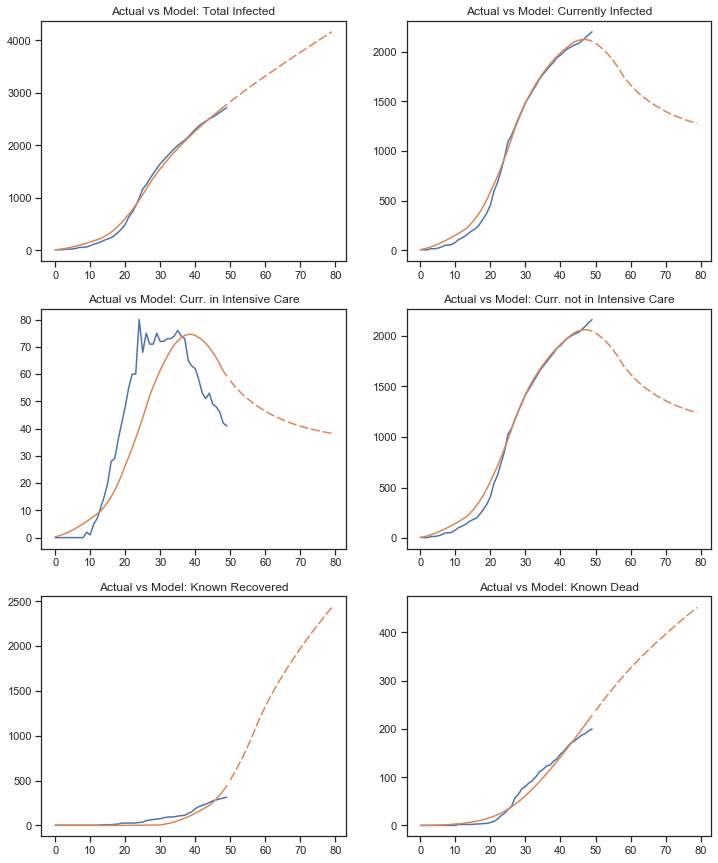



Geo:  Toscana
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   8.37K vs   8.52K (135.00 vs 195.29), errore: -149.27
            Currently Infected:   6.50K vs   6.52K (26.00 vs  9.95), errore: -28.76
        Currently in Int. Care:  192.00 vs  299.08 (-6.00 vs -1.85), errore: -107.08
                 Tot Recovered:   1.24K vs   1.29K (90.00 vs 154.78), errore: -49.52
                      Tot Dead:  637.00 vs  707.99 (19.00 vs 30.56), errore: -70.99

          % Increase, Infected:    1.64 vs    2.35 ( 0.07 vs -0.08), errore: -0.71
              % Mortality Rate:    1.39 vs    2.38 (-2.01 vs  0.17), errore: -0.98
         % Known Recovery Rate:    0.29 vs    0.47 ( 0.05 vs -0.00), errore: -0.18

             % Recovered / Tot:   14.80 vs   15.12 ( 0.85 vs  1.50), errore: -0.32
                  % Dead / Tot:    7.61 vs    8.31 ( 0.11 vs  0.17), errore: -0.70
              % Intensive Care:    2.96 vs    4.58 (-0.10 vs -0.04), errore: -1.63
       

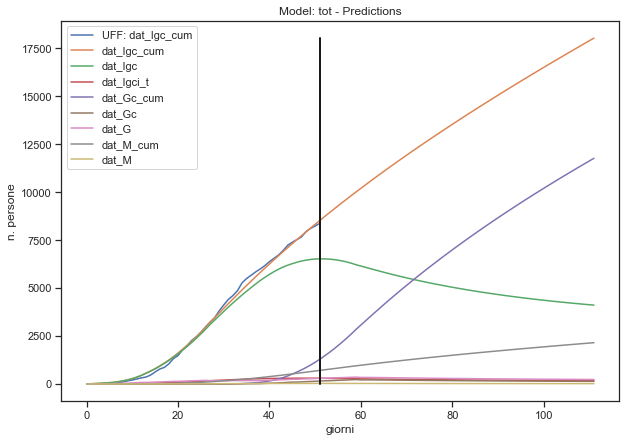

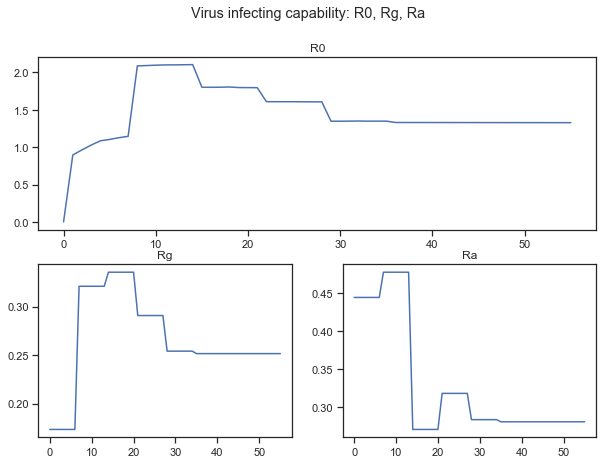

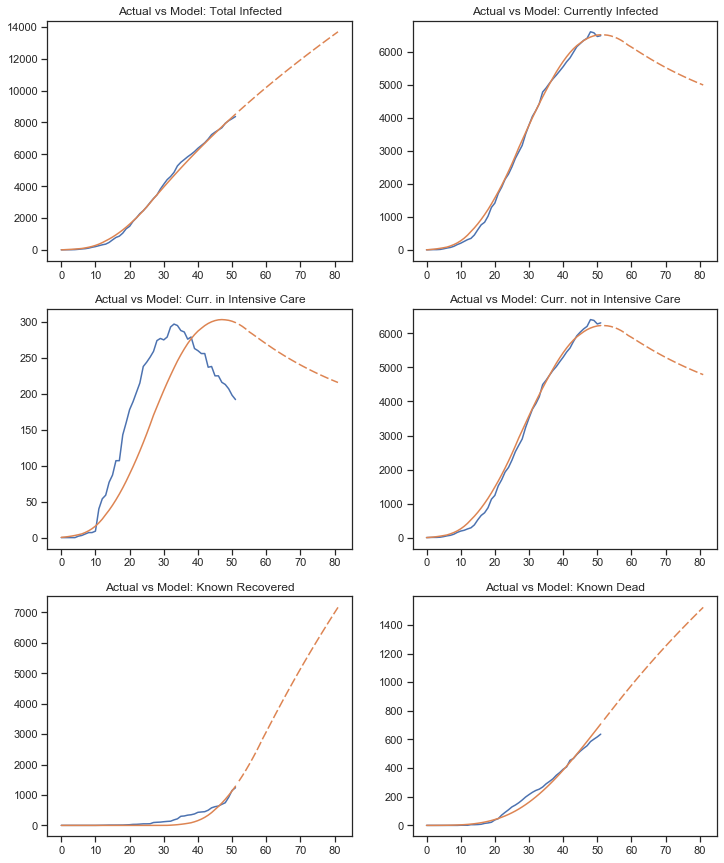



Geo:  Trentino-Alto Adige
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   5.91K vs   6.23K (156.00 vs 168.62), errore: -320.61
            Currently Infected:   3.54K vs   3.49K (-4.00 vs -13.56), errore: 44.78
        Currently in Int. Care:   64.00 vs  114.36 (-6.00 vs -0.46), errore: -50.36
                 Tot Recovered:   1.77K vs   2.07K (142.00 vs 157.11), errore: -295.44
                      Tot Dead:  605.00 vs  674.95 (18.00 vs 25.08), errore: -69.95

          % Increase, Infected:    2.71 vs    2.78 ( 1.23 vs -0.09), errore: -0.07
              % Mortality Rate:    4.01 vs    4.48 ( 1.10 vs  0.16), errore: -0.47
         % Known Recovery Rate:    0.51 vs    0.72 ( 0.20 vs -0.00), errore: -0.21

             % Recovered / Tot:   29.94 vs   33.14 ( 1.66 vs  1.67), errore: -3.20
                  % Dead / Tot:   10.23 vs   10.83 ( 0.04 vs  0.11), errore: -0.60
              % Intensive Care:    1.81 vs    3.27 (-0.17 vs -0.00), errore: 

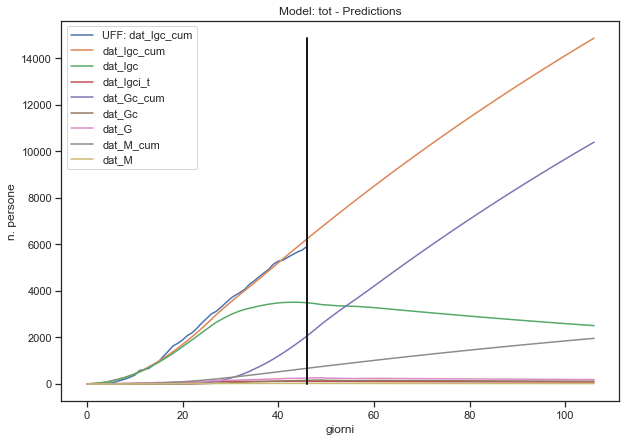

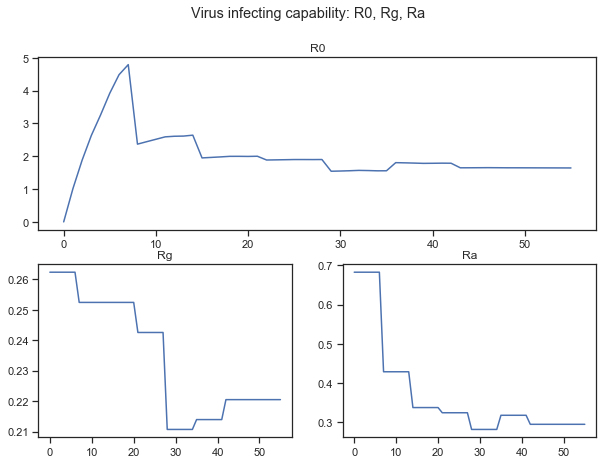

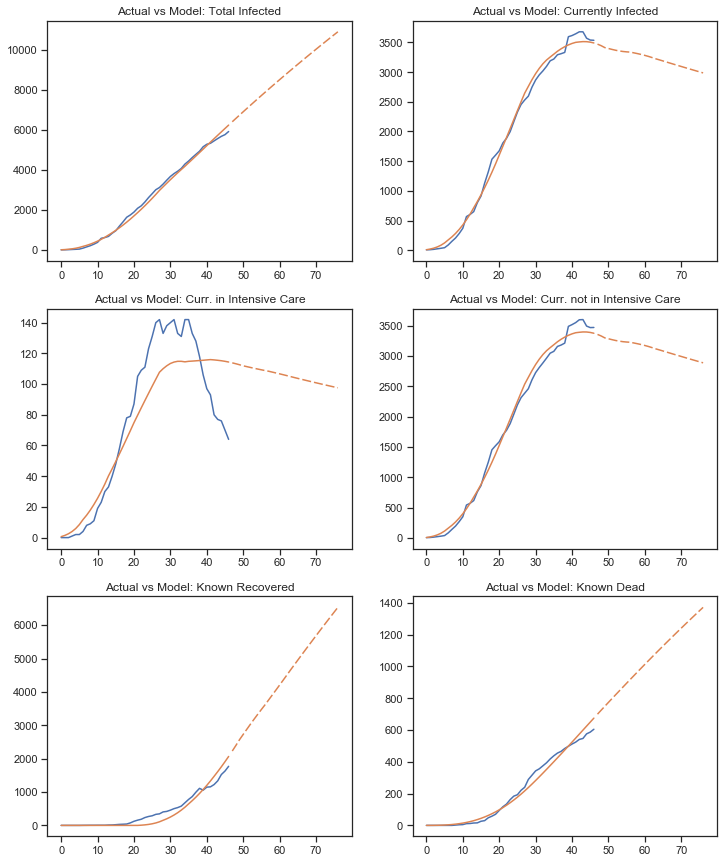



Geo:  Valle d'Aosta
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:   1.09K vs   1.06K (15.00 vs 16.01), errore: 30.98
            Currently Infected:  562.00 vs  491.59 (13.00 vs -15.73), errore: 70.41
        Currently in Int. Care:   10.00 vs   15.89 ( 0.00 vs -0.60), errore: -5.89
                 Tot Recovered:  401.00 vs  421.38 ( 1.00 vs 27.47), errore: -20.38
                      Tot Dead:  125.00 vs  144.05 ( 1.00 vs  4.27), errore: -19.05

          % Increase, Infected:    1.40 vs    1.54 (-6.66 vs -0.08), errore: -0.14
              % Mortality Rate:    0.18 vs    5.41 (-4.09 vs  0.23), errore: -5.23
         % Known Recovery Rate:    0.18 vs    0.84 (-0.02 vs -0.00), errore: -0.66

             % Recovered / Tot:   36.86 vs   39.86 (-0.42 vs  2.03), errore: -3.01
                  % Dead / Tot:   11.49 vs   13.63 (-0.07 vs  0.20), errore: -2.14
              % Intensive Care:    1.78 vs    3.23 (-0.04 vs -0.02), errore: -1.45
        

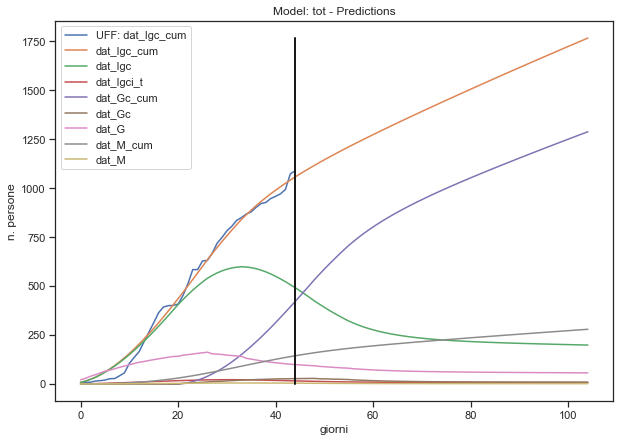

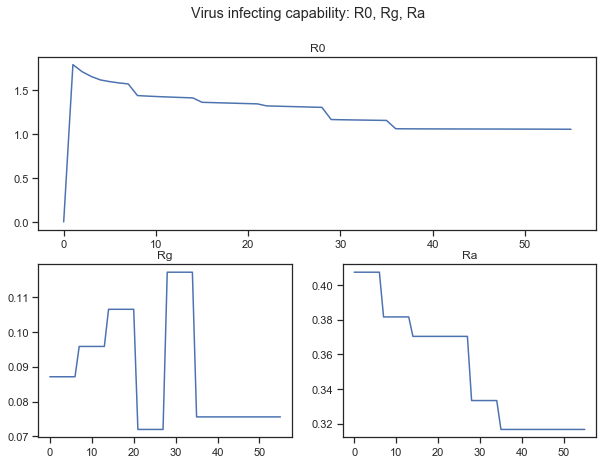

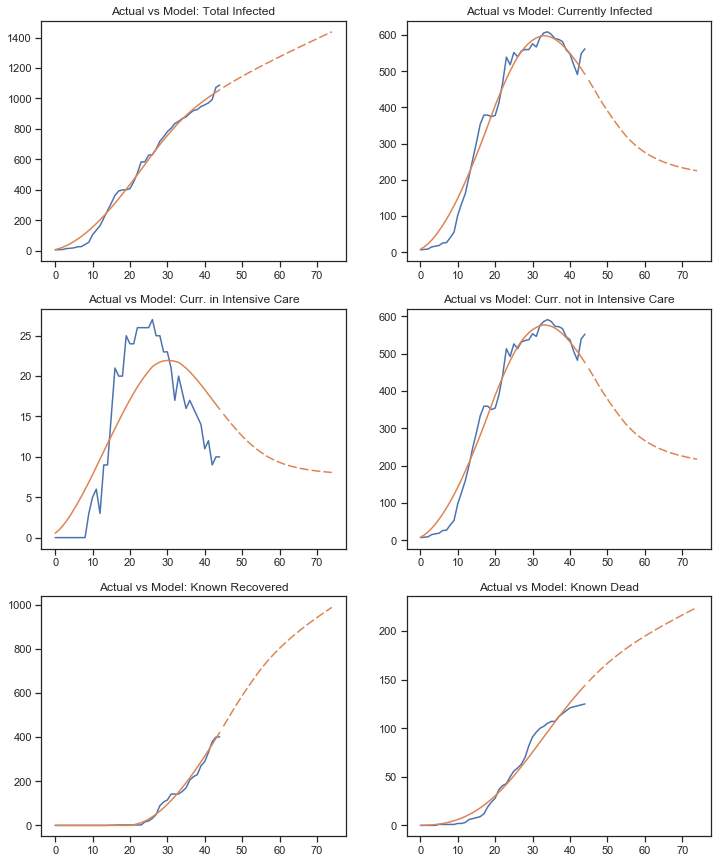



Geo:  Veneto
**** Compute Model Stats, for date: 2020-04-19 ****
                  Tot Infected:  15.94K vs  16.30K (243.00 vs 268.67), errore: -364.02
            Currently Infected:  10.21K vs  10.67K (-234.00 vs -75.21), errore: -456.69
        Currently in Int. Care:  184.00 vs  337.18 (-6.00 vs -2.19), errore: -153.18
                 Tot Recovered:   4.64K vs   4.47K (449.00 vs 301.32), errore: 164.31
                      Tot Dead:   1.09K vs   1.16K (28.00 vs 42.57), errore: -71.63

          % Increase, Infected:    1.55 vs    1.68 (-0.52 vs -0.13), errore: -0.13
              % Mortality Rate:    4.30 vs    2.81 (-0.02 vs  0.09), errore: 1.49
         % Known Recovery Rate:    0.27 vs    0.40 (-0.04 vs -0.00), errore: -0.13

             % Recovered / Tot:   29.11 vs   27.45 ( 2.41 vs  1.42), errore: 1.66
                  % Dead / Tot:    6.82 vs    7.11 ( 0.07 vs  0.15), errore: -0.29
              % Intensive Care:    1.80 vs    3.16 (-0.02 vs  0.00), errore: -1.36
     

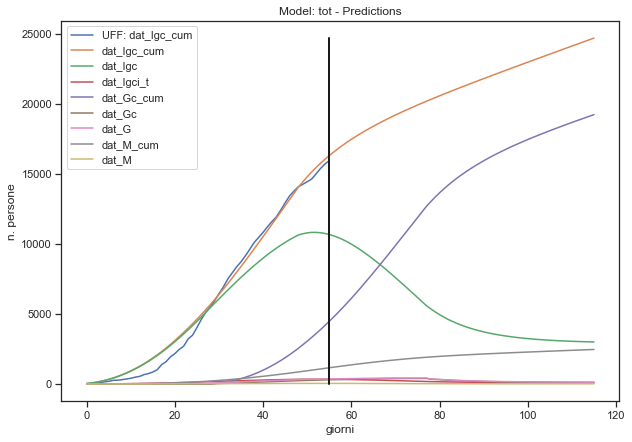

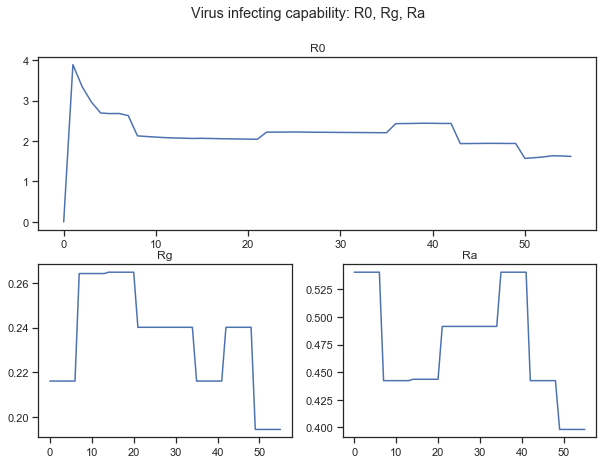

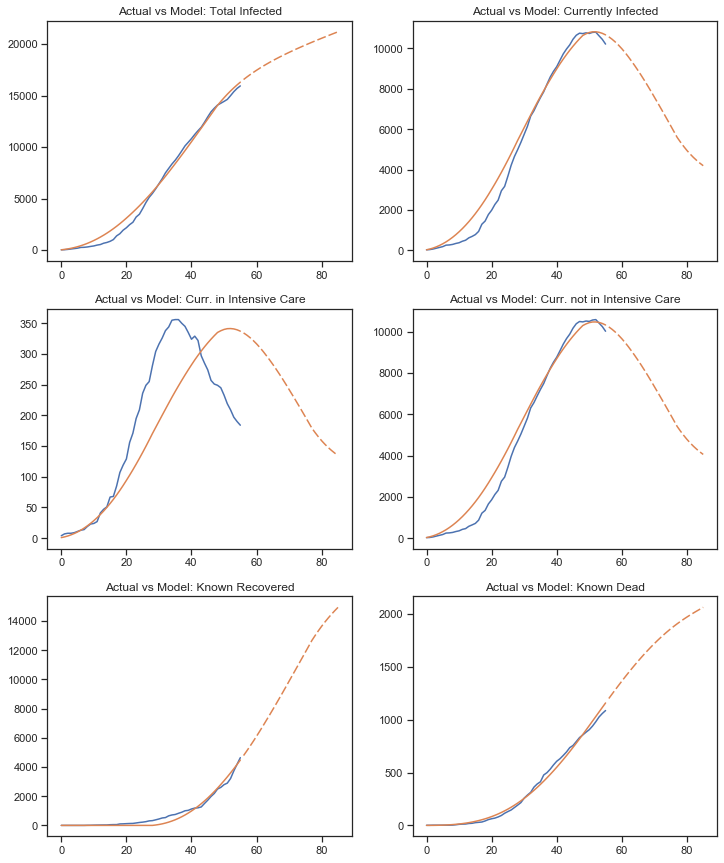

In [15]:
for i, geo_code in enumerate(geo_list):
    print("Geo: ", geo_name_list[i])
    
    if(geo_code == 'aggr'):
        data_uff = data_mgmt.ActualData(import_data.data_aggr)
    else:
        data_uff = data_mgmt.ActualData(
            import_data.data[import_data.data['geo_code'] == geo_code].reset_index()
        )
    opt_model = opt_mod_obj['model'][geo_code]['opt']
    opt_model_window = opt_mod_obj['model'][geo_code]['opt_window']
    data_uff_len = len(data_uff.date)
    
    # Compute Stats
    print("**** Compute Model Stats, for date: " + __DATE_CURR + " ****")
    date_curr = __DATE_CURR
    stats_window = ModelStats(opt_model_window[mod_name], data_uff)
    stats_window.printKpis(date_curr)
    
    date_Igc_cum = stats_window.data['mod_Igc_cum'].idxmax()
    date_Igc = stats_window.data['mod_Igc'].idxmax()
    peak = {
        #'Igc_cum': (stats_window.data['mod_Igc_cum'].idxmax(), format_number(stats_window.data['mod_Igc_cum'].max())),
        'Igc': (str(stats_window.data['mod_Igc'].idxmax()), format_number(stats_window.data['mod_Igc'].max())),
        'Igci': (str(stats_window.data['mod_Igci_t'].idxmax()), format_number(stats_window.data['mod_Igci_t'].max())),
        'M': (str(stats_window.data['mod_M'].idxmax()), format_number(stats_window.data['mod_M'].max())),
        #'M_cum': (stats_window.data['mod_M_cum'].idxmax(), format_number(stats_window.data['mod_M_cum'].max())),
        #'Popi': (format_number(stats_window.data.loc[date_Igc_cum, 'mod_Popi_t']), format_number(stats_window.data.loc[date_Igc, 'mod_Popi_t']))
    }
    print()
    print("**** Peak Date and Value ****")
    for val in peak.keys():
        print(val + ": ", end="")
        print(peak[val])
    print()
    
    # Compute Model graphs
    print("**** Compute Model Graphs ****")
    graphOptAll('tot', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=__PRED_DAYS)
    graphR0(opt_model_window[mod_name]['mod'], length = data_uff_len)
    graphAllCompActBox(mod_name, opt_model_window, data_uff, pred_days = 30)
    
    
    
    print()
    print()